# Projeto COVID-19

## Digital Innovation One

Primeiro vamos importar algumas das bibliotecas necessárias para nosso projeto de hoje.

In [149]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

# Vamos importar os gráficos para o projeto

In [150]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [151]:
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Conferir tipos das colunas

In [152]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiusculas e nem caracteres especiais.
Vamos implementar uma função de limpeza dos nomes dessas colunas

In [153]:
import re

In [154]:
def corrige_colunas(col_nome):
    return re.sub(r"[/| ]", "", col_nome).lower()

In [155]:
corrige_colunas("AdgE/P ou") #Teste Regex funcionou

'adgepou'

# Vamos corrigir todas as colunas do DataFrame

In [156]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [157]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [158]:
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

# Brasil

Vamos selecionar apenas os dados do Brasil para analisar

Contagens de linhas por pais no DataFrame

In [159]:
df.countryregion.value_counts()

US                     4990
Mainland China         3687
Canada                 1093
Australia               788
France                  752
                       ... 
North Ireland             1
Channel Islands           1
Cape Verde                1
Republic of Ireland       1
East Timor                1
Name: countryregion, Length: 223, dtype: int64

Verificar lista de paises.

In [160]:
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

Filtrar Brasil

In [161]:
df.loc[df.countryregion == "Brazil"]

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


Filtrar apenas observações com casos confirmados no Brasil

In [162]:
brasil = df.loc[
    (df.countryregion == "Brazil") &
    (df.confirmed >= 1)
]

In [163]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos Confirmados

## Gráfico da evolução dos casos confirmados.

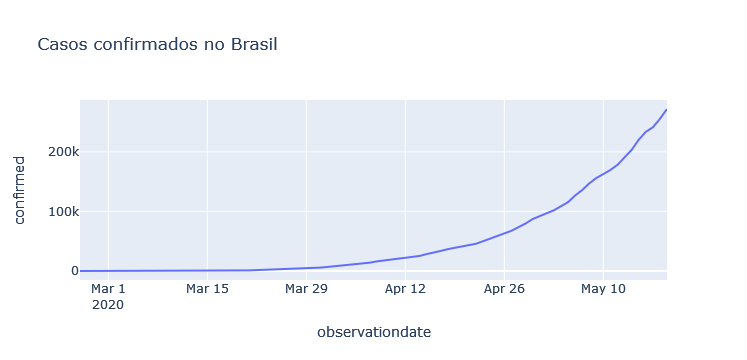

In [164]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

## Novos casos por dia

### Técnica de Programação Funcional

In [165]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x == 0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x - 1],
    np.arange(brasil.shape[0])
))

C:\Users\Cliente\AppData\Local\Temp\ipykernel_4488\1807223197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


# Novos casos

## Gráfico de novos casos por dia.

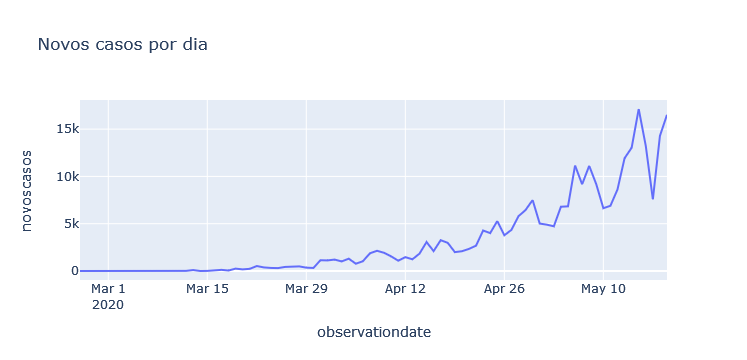

In [167]:
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

# Número de Óbitos

## Gráfico de Óbitos.

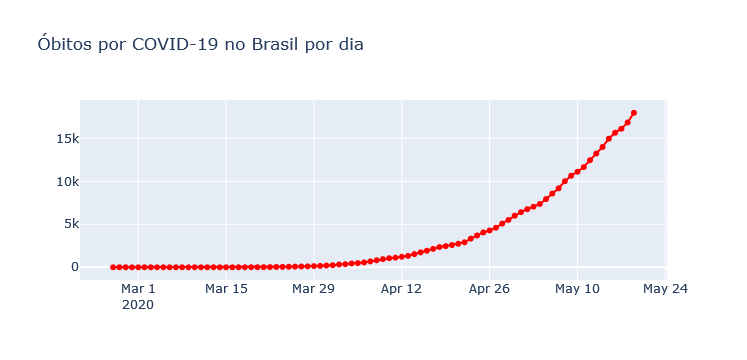

In [168]:
# Estrutura do Gráfico

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Morte', 
               mode='lines+markers', line={'color':'red'})
)

# Layout do Gráfico

fig.update_layout(title='Óbitos por COVID-19 no Brasil por dia')

fig.show()

# Taxa de Crescimento

taxa_crescimento = (presente / passado) ** (1 / n) - 1

In [169]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    #Se a data_inicio for "None", define como a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.datetime(data_inicio)
        
    
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Definir valores do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Definir número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # calcular a Taxa de crescimento
    taxa = (presente / passado) ** (1 / n) - 1
    
    return taxa*100

# Taxa de crescimento médio do COVID no brasil em todo período.

In [170]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

In [171]:
def taxa_crescimento_diaria(data, variable, data_inicio=None, data_fim=None):
    #Se a data_inicio for "None", define como a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    
    # Definir número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x - 1]) / data[variable].iloc[x - 1],
        range(1, n + 1)
        ))
    return np.array(taxas) * 100   
    

In [172]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [173]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

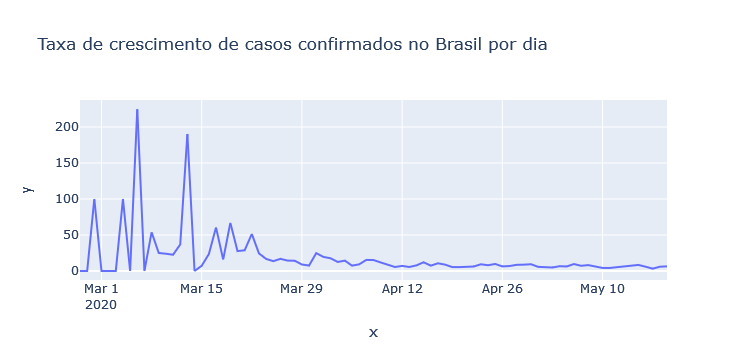

In [174]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil por dia')

# Predições

In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [176]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [177]:
res = seasonal_decompose(confirmados)

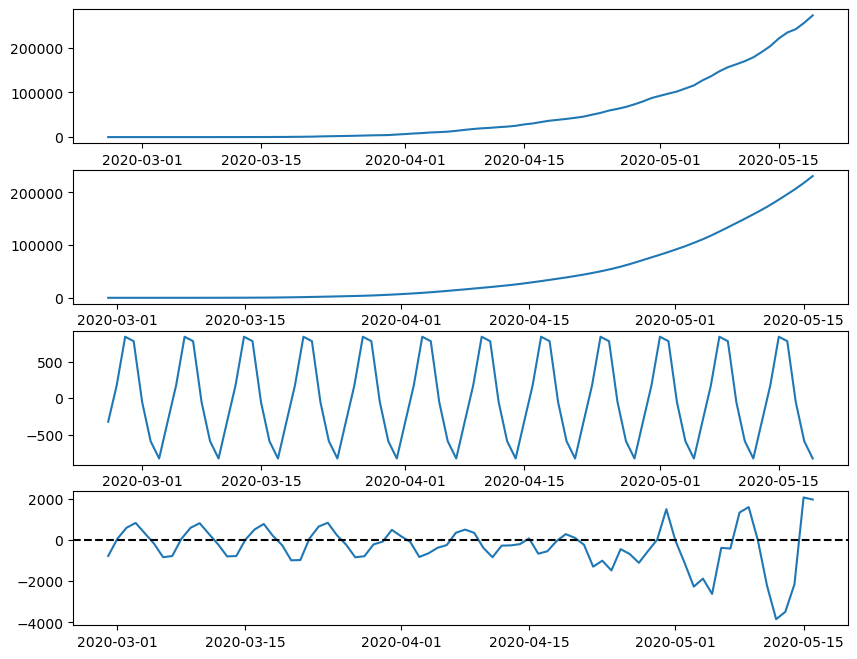

In [178]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8))

ax1.plot(res.observed)                     # Observados
ax2.plot(res.trend)                        # Tendência
ax3.plot(res.seasonal)                     # Sasonalidade
ax4.plot(confirmados.index, res.resid)     # Residos(Ruido)
ax4.axhline( 0, linestyle = 'dashed', c = 'black')
plt.show()

# ARIMA - (Séries Temporais)

### Instalar o Pacote ARIMA
!pip install pmdarima

In [179]:
# Importando o Pacote
from pmdarima.arima import auto_arima

In [180]:
# Criando o Modelo
modelo = auto_arima(confirmados)

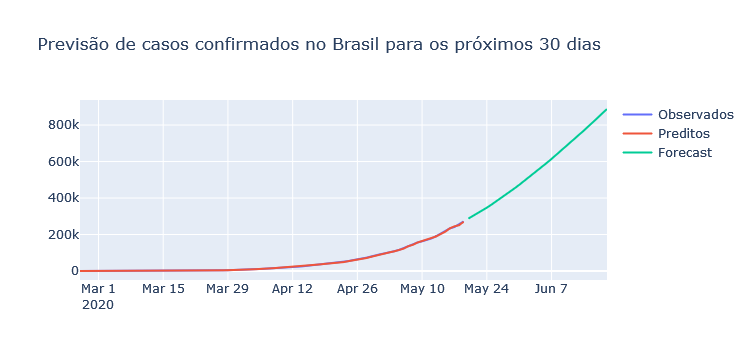

In [181]:
# Observados (Datos históricos)
fig = go.Figure(go.Scatter(
    x = confirmados.index, y = confirmados, name = 'Observados'  
))

# Preditos (Datos históricos para Predizer período histórico)
fig.add_trace(go.Scatter(
    x = confirmados.index, y = modelo.predict_in_sample(), name = 'Preditos'  
))

# Forecast (Predição de datas Futuras)
fig.add_trace(go.Scatter(
    x = pd.date_range('2020-05-20', '2020-06-20'), y = modelo.predict(31), name = 'Forecast'  
))

fig.update_layout(title = 'Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

 # Modelo de Crescimento

Vamos usar a Biblioteca fbprophet

In [182]:
# Instalar biblioteca Prophet
#!conda install -c conda-forge fbprophet -y

!pip install prophet

In [229]:
# Importar a Biblioteca Prophet
from prophet import Prophet

### Preprocessamento (Exigência Biblioteca)

In [230]:
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:0]

#### Renomeando Colunas

In [231]:
train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)

#### Definir Modelo de crescimento

In [232]:
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25',
                                                   '2020-05-03', '2020-05-10'])

In [233]:
pop = 211463256
#pop = 1000000
#pop = 34780462 # Confirmados Atualizado em 22 de out. à(s) 19:00, hora loca
train['cap'] = pop

#### Treinar o Modelo

In [234]:
profeta.fit(train)

19:25:05 - cmdstanpy - INFO - Chain [1] start processing
19:25:05 - cmdstanpy - INFO - Chain [1] done processing


#### Construir Previsões

In [235]:
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

#### Criar o Gráfico modelo Phophet

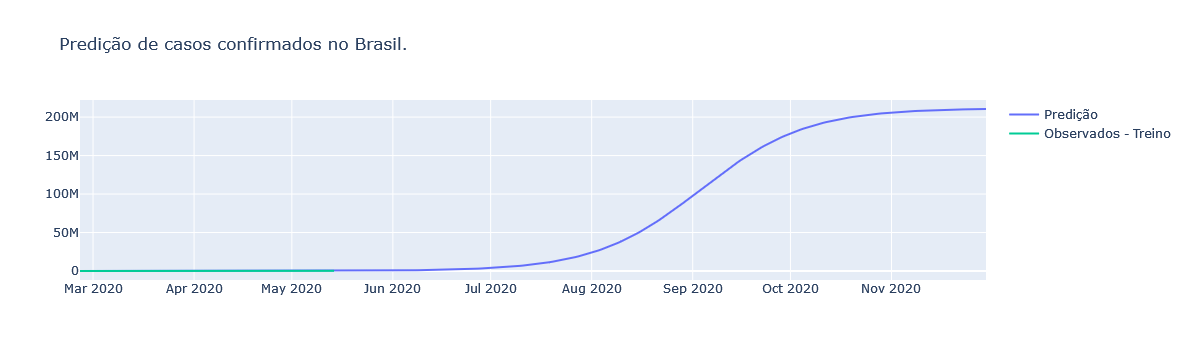

In [236]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = forecast.ds, y = forecast.yhat, name ='Predição'))
fig.add_trace(go.Scatter(x = test.index, y = test, name ='Observados - Teste'))
fig.add_trace(go.Scatter(x = train.ds, y = train.y, name ='Observados - Treino'))
fig.update_layout(title = 'Predição de casos confirmados no Brasil.')

fig.show()